In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys
import os
sys.path
sys.path.append('/Users/theomaetz/Downloads/MA3/INL/lighthouse-main')
os.environ['DATA_DIR'] = '/Volumes'


from pathlib import Path
import matplotlib.pyplot as plt
import lighthouse.metadata as metadata
from lighthouse.data_loader.load_chuv import load_absd, load_dt5, load_gdp, load_smr
import numpy as np

training_sessions = metadata.get_training_sessions()

2024-10-03 11:02:59.614 | WARNING  | lighthouse.metadata:get_training_sessions:125 - Only found 65 out of 66 training sessions


In [4]:
dt5_files = list(Path(training_sessions[0]).glob("**/*.dt5"))
dt5_file = dt5_files[0]
display(dt5_files)

[PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/ABSD data/2023_10_24_14_07_01_01of02.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_13_59_55 (rec1)/ABSD data/2023_10_24_14_07_01_02of02.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_01of09.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_02of09.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_03of09.dt5'),
 PosixPath('/Volumes/__UP2/0_RAW_DATA/UP2_001/UP2001_2023_10_24_BSITraining_day4/WISCI/2023_10_24_14_17_20 (rec2_HandOpen_Close)/ABSD data/2023_10_24_14_18_47_04of09

In [5]:
signals, ch_names = load_dt5(dt5_file, return_ch_names=True, return_all=True)

2024-10-03 10:32:02.653 | INFO     | lighthouse.data_loader.load_chuv:load_dt5:196 - Scenario Name: classBCIViewerAvatarAllDegreesCourtine
2024-10-03 10:32:02.659 | INFO     | lighthouse.data_loader.load_chuv:load_dt5:199 - Sub Scenario Name: classBSISubScenarioUpperJointsClassif
2024-10-03 10:32:13.585 | WARNING  | lighthouse.data_loader.load_chuv:load_dt5:422 - Skipping gamma as it is all nan


In [6]:
signals.shape, ch_names

((129, 177000),
 ['add_ch_0',
  'add_ch_1',
  'add_ch_2',
  'add_ch_3',
  'add_ch_4',
  'add_ch_5',
  'add_ch_6',
  'add_ch_7',
  'add_ch_8',
  'is_updating',
  'time__0',
  'time__1',
  'time__2',
  'time__3',
  'time__4',
  'time__5',
  'alpha_without_sm__0',
  'alpha_without_sm__1',
  'alpha_without_sm__2',
  'alpha_without_sm__3',
  'alpha_without_sm__4',
  'alpha_without_sm__5',
  'alpha_without_sm__6',
  'alpha_without_sm__7',
  'alpha_without_sm__8',
  'alpha_without_sm__9',
  'alpha_without_sm__10',
  'alpha_without_sm__11',
  'alpha_without_sm__12',
  'alpha_with_sm__0',
  'alpha_with_sm__1',
  'alpha_with_sm__2',
  'alpha_with_sm__3',
  'alpha_with_sm__4',
  'alpha_with_sm__5',
  'alpha_with_sm__6',
  'alpha_with_sm__7',
  'alpha_with_sm__8',
  'alpha_with_sm__9',
  'alpha_with_sm__10',
  'alpha_with_sm__11',
  'alpha_with_sm__12',
  'latency',
  'alpha_pred__idle',
  'alpha_pred__shoulder__flexion',
  'alpha_pred__shoulder__extension',
  'alpha_pred__shoulder__adduction',
  

In [15]:
print(signals[ch_names.index("y_pred__shoulder__abduction")].shape)

(177000,)


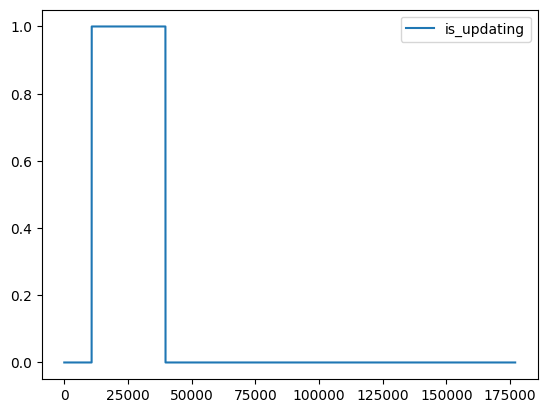

In [33]:
plt.plot(signals[ch_names.index("is_updating")], label="is_updating")
plt.legend()
plt.show()

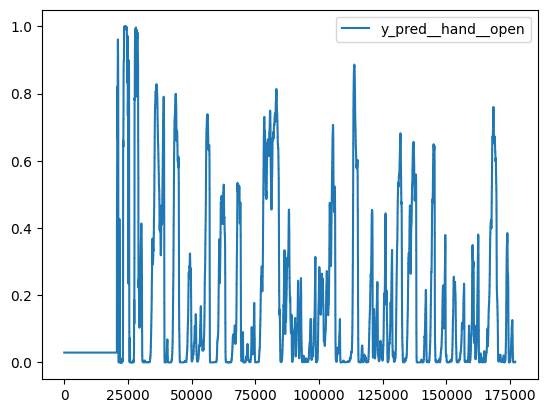

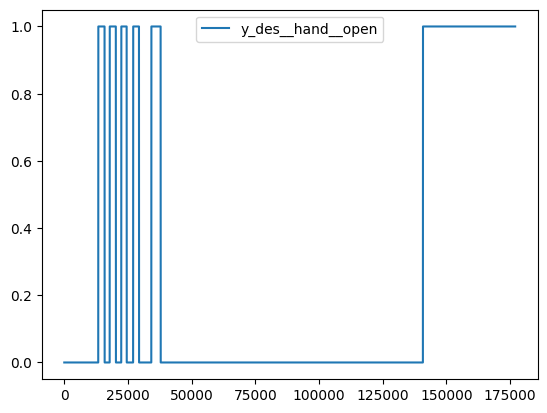

In [27]:
for i in ['y_pred__shoulder__flexion',
  'y_pred__shoulder__extension',
  'y_pred__shoulder__adduction',
  'y_pred__shoulder__abduction',
  'y_pred__shoulder__internal_rotation',
  'y_pred__shoulder__external_rotation',
  'y_pred__elbow__flexion',
  'y_pred__elbow__extension',
  'y_pred__wrist__pronation',
  'y_pred__wrist__supination',
  'y_pred__hand__open',
  'y_pred__hand__close',
  'y_des__shoulder__flexion',
  'y_des__shoulder__extension',
  'y_des__shoulder__adduction',
  'y_des__shoulder__abduction',
  'y_des__shoulder__internal_rotation',
  'y_des__shoulder__external_rotation',
  'y_des__elbow__flexion',
  'y_des__elbow__extension',
  'y_des__wrist__pronation',
  'y_des__wrist__supination',
  'y_des__hand__open',
  'y_des__hand__close',]:
    if np.any(signals[ch_names.index(i)][25_000:]):
      plt.plot(signals[ch_names.index(i)], label=i)
      plt.legend()
      plt.show()

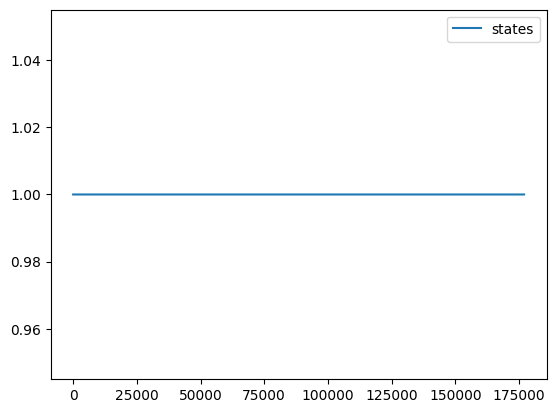

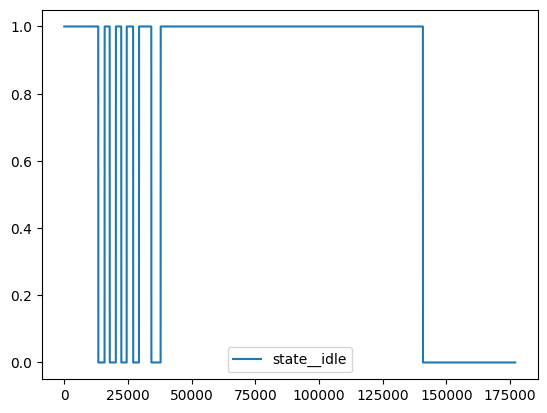

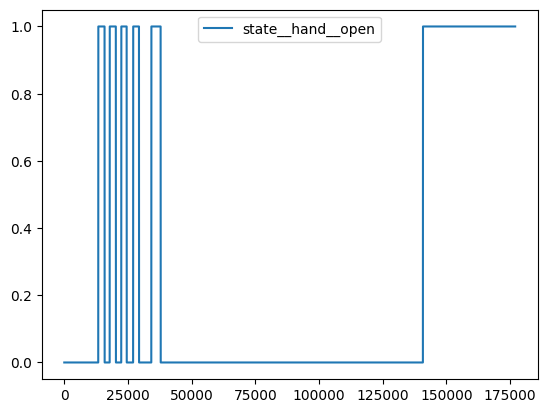

In [32]:
for i in ['states',
  'state__idle',
  'state__shoulder__flexion',
  'state__shoulder__extension',
  'state__shoulder__adduction',
  'state__shoulder__abduction',
  'state__shoulder__internal_rotation',
  'state__shoulder__external_rotation',
  'state__elbow__flexion',
  'state__elbow__extension',
  'state__wrist__pronation',
  'state__wrist__supination',
  'state__hand__open',
  'state__hand__close']:
    if np.any(signals[ch_names.index(i)]):
      plt.plot(signals[ch_names.index(i)], label=i)
      plt.legend()
      plt.show()

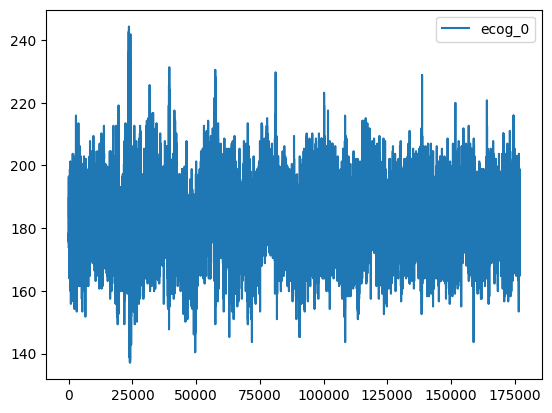

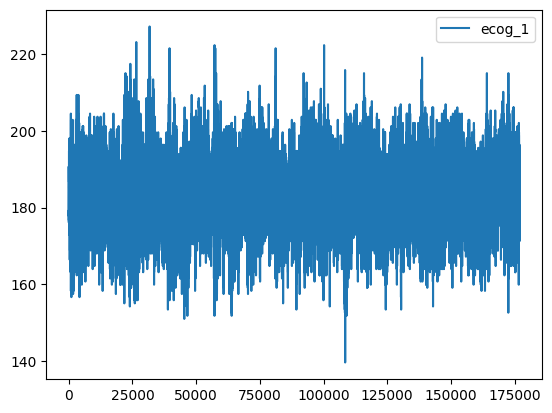

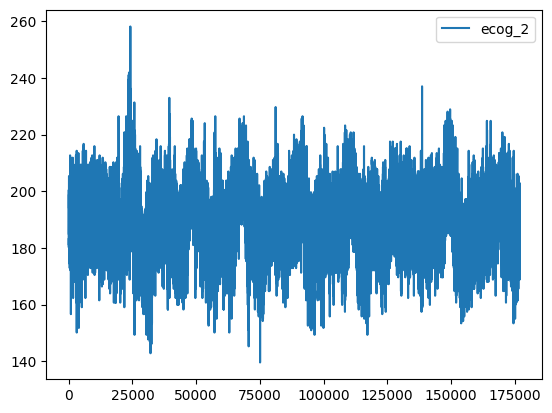

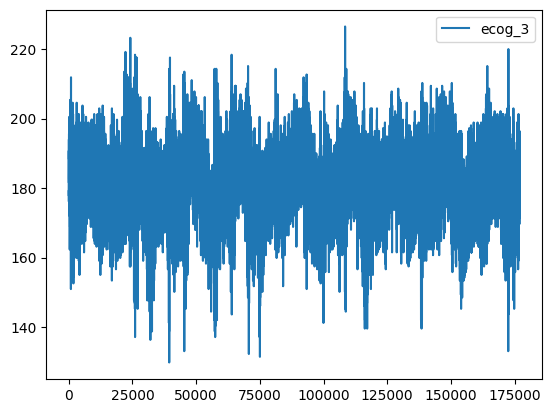

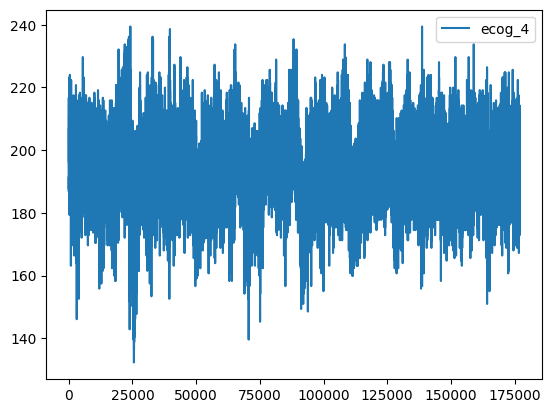

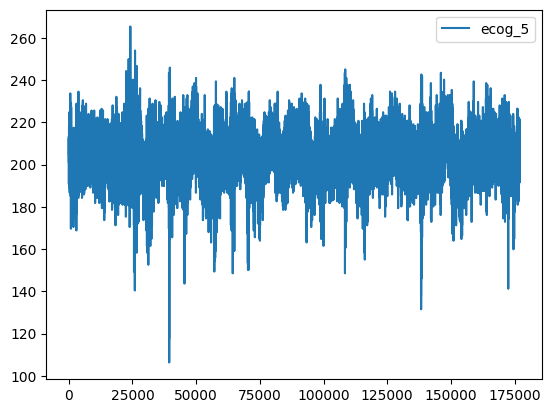

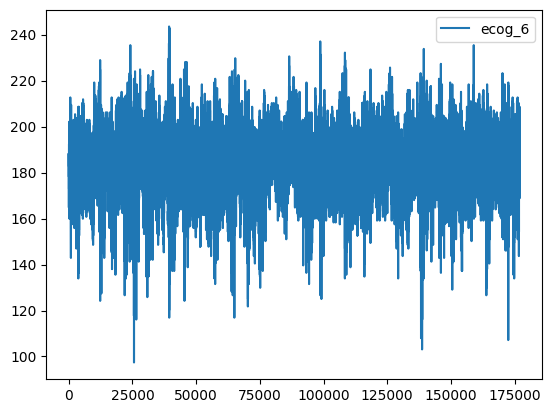

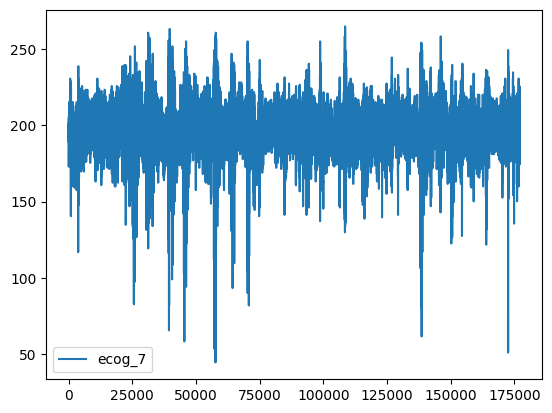

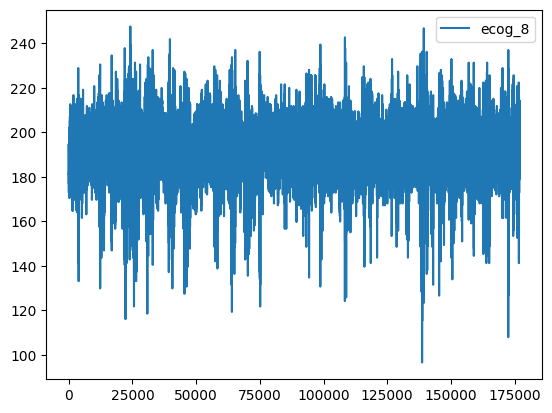

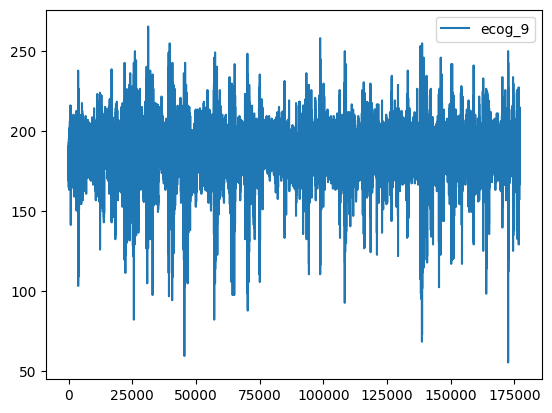

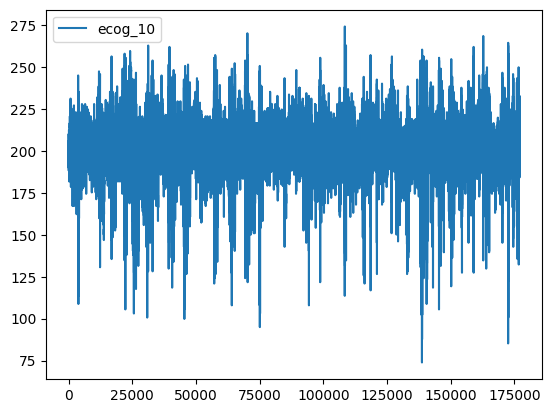

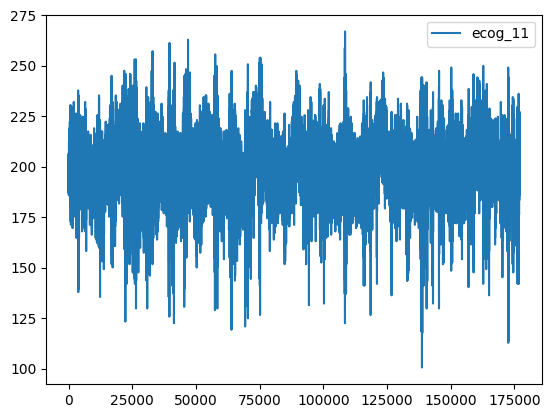

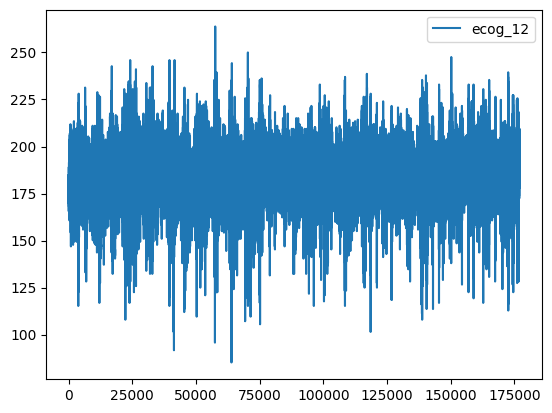

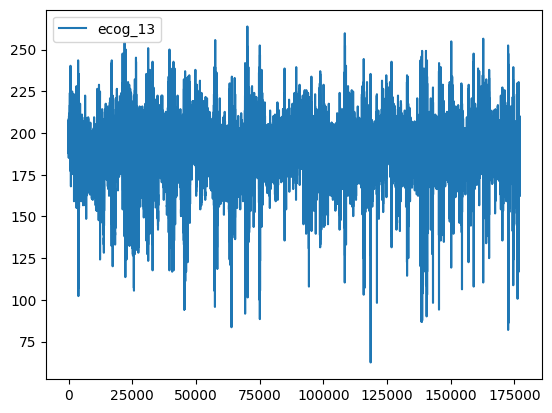

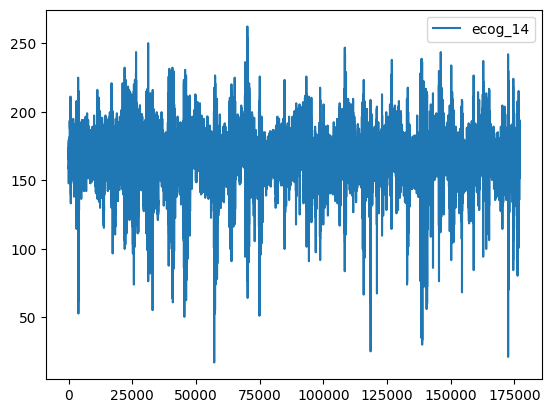

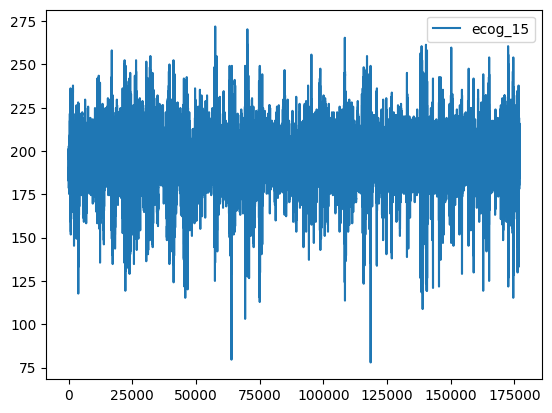

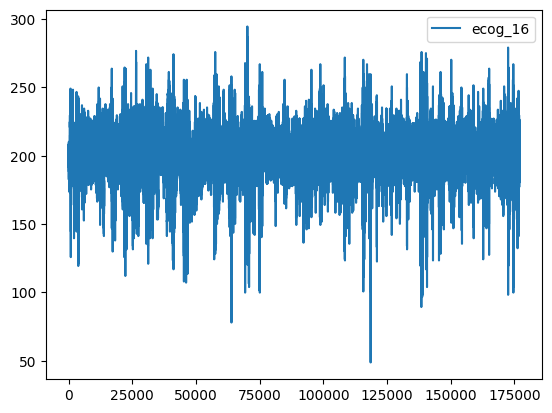

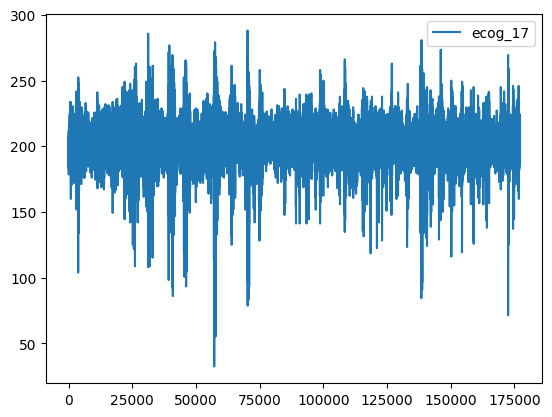

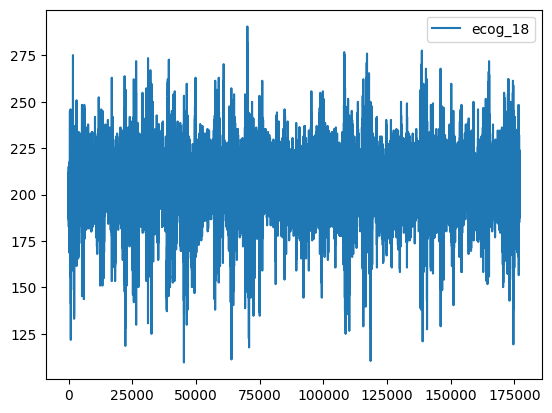

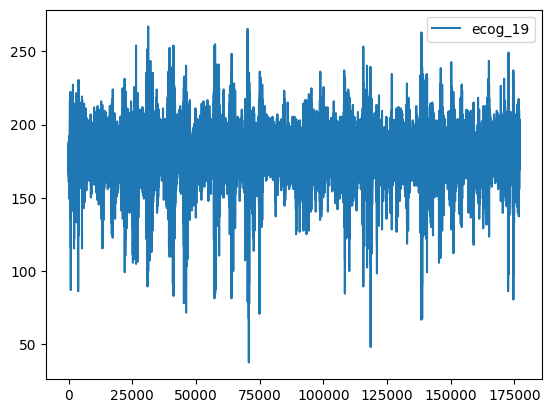

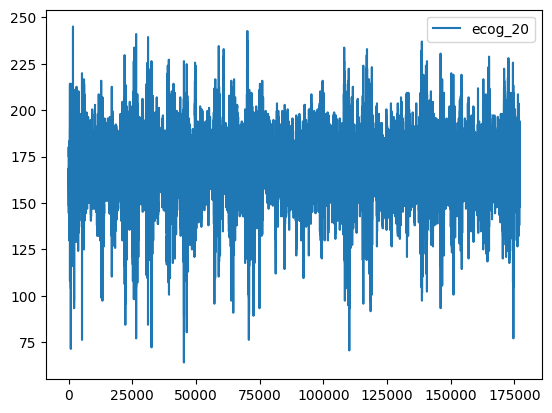

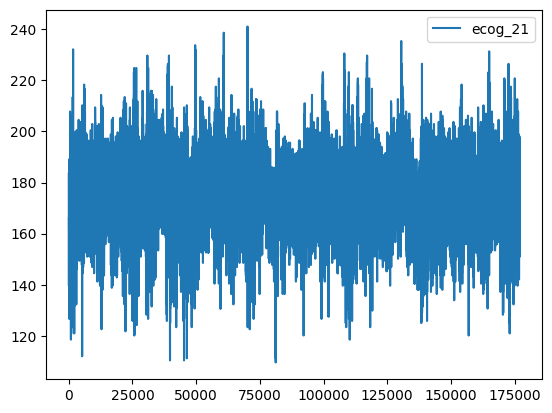

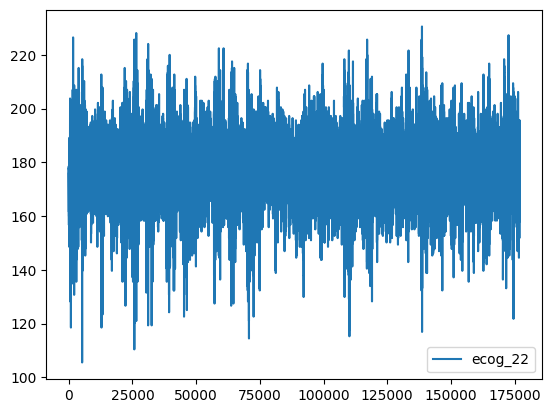

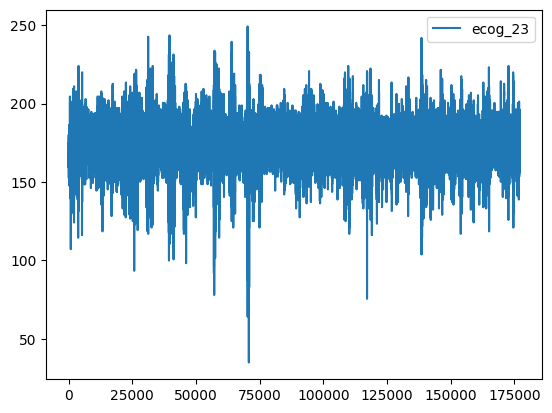

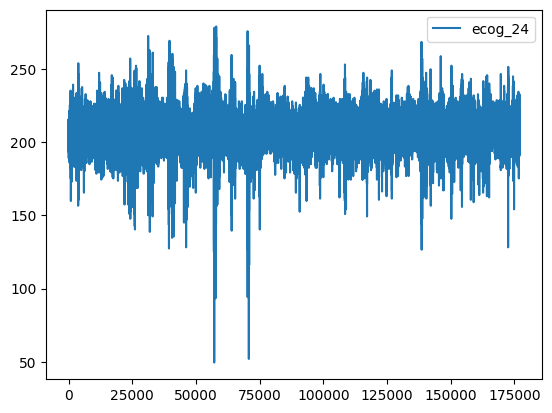

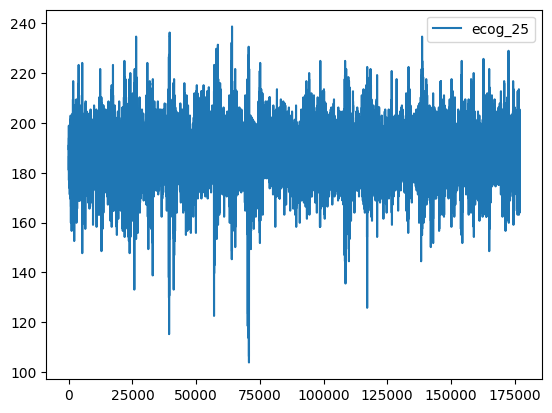

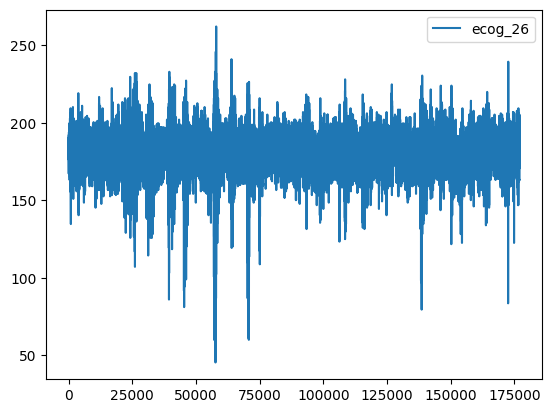

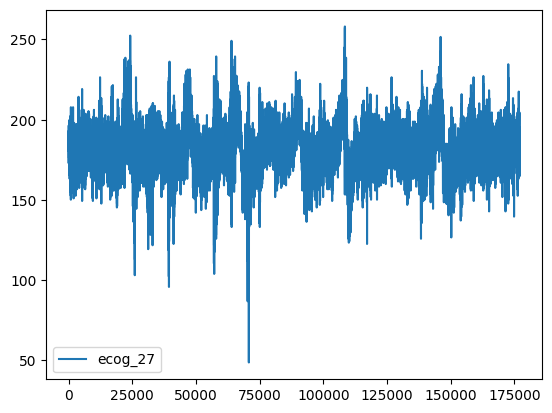

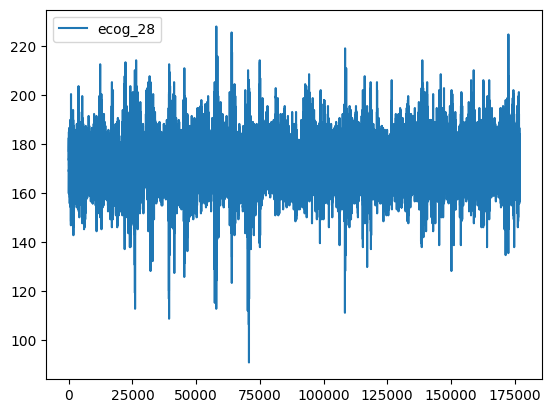

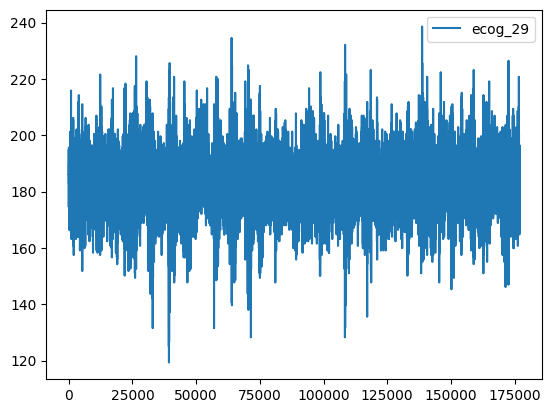

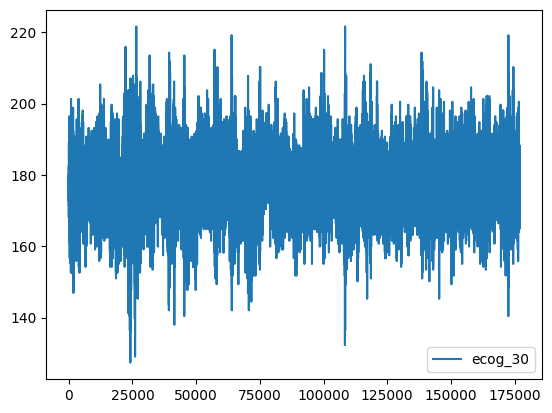

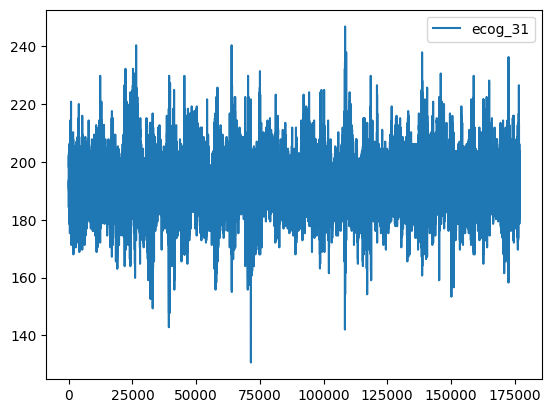

In [29]:
for j in ['ecog_0',
  'ecog_1',
  'ecog_2',
  'ecog_3',
  'ecog_4',
  'ecog_5',
  'ecog_6',
  'ecog_7',
  'ecog_8',
  'ecog_9',
  'ecog_10',
  'ecog_11',
  'ecog_12',
  'ecog_13',
  'ecog_14',
  'ecog_15',
  'ecog_16',
  'ecog_17',
  'ecog_18',
  'ecog_19',
  'ecog_20',
  'ecog_21',
  'ecog_22',
  'ecog_23',
  'ecog_24',
  'ecog_25',
  'ecog_26',
  'ecog_27',
  'ecog_28',
  'ecog_29',
  'ecog_30',
  'ecog_31']:
    plt.plot(signals[ch_names.index(j)], label=j)
    plt.legend()
    plt.show()